<a href="https://colab.research.google.com/github/Sheikhshahur/Handwritten_digit_recognition/blob/main/Handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
# import libraries
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# importing dataset...
mnist = tf.keras.datasets.mnist

In [4]:
# loading the dataset and assigning the values to different variables
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [6]:
# building the model....
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation= 'softmax'))

In [7]:
# model compiling...
model.compile(loss= "sparse_categorical_crossentropy", optimizer = 'Adam', metrics = ['accuracy'])

In [8]:
# training the model...
history = model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2570 - accuracy: 0.9251
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1043 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0721 - accuracy: 0.9769


In [9]:
model.save('handwritten.model')

In [10]:
model = tf.keras.models.load_model('handwritten.model')

loss , accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0930 - accuracy: 0.9711
0.09303553402423859
0.9710999727249146


1/1 [==============================] - 0s 154ms/step
Prediction for digit-1.png: 8


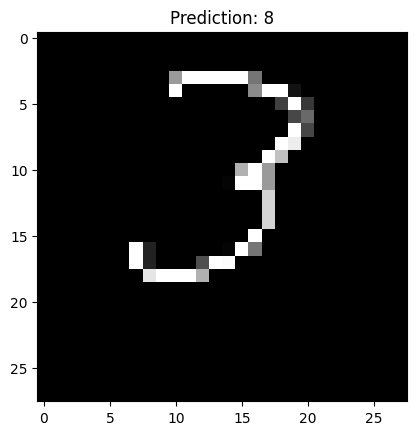

1/1 [==============================] - 0s 35ms/step
Prediction for digit-2.png: 8


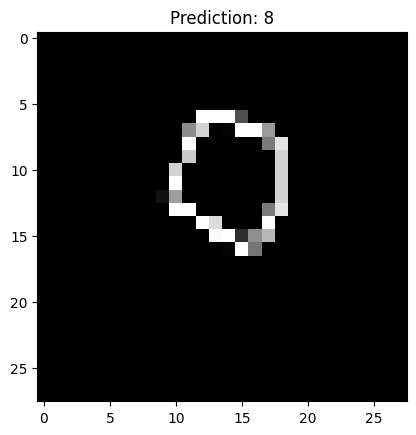

1/1 [==============================] - 0s 24ms/step
Prediction for digit-3.png: 8


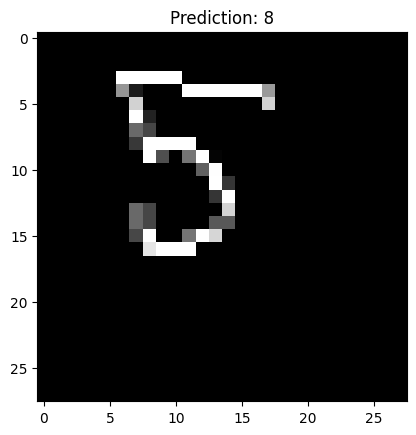

1/1 [==============================] - 0s 22ms/step
Prediction for digit-4.png: 8


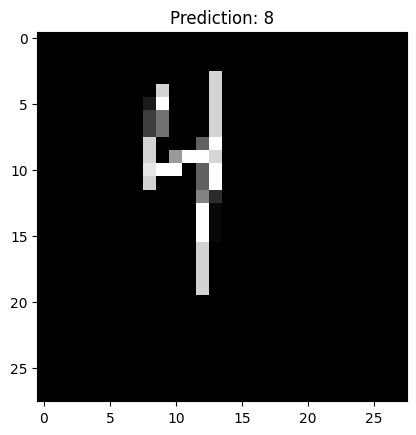

1/1 [==============================] - 0s 23ms/step
Prediction for digit-5.png: 8


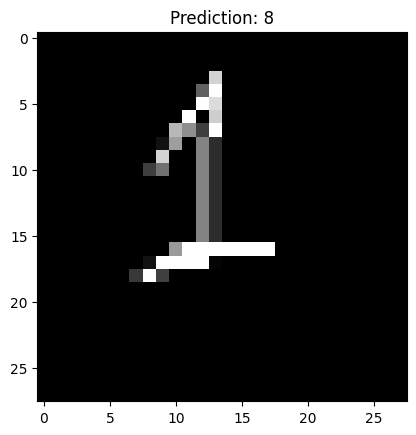

In [11]:
import traceback

image_number = 1

while os.path.isfile(f"digit-{image_number}.png"):
    try:
        img = cv2.imread(f"digit-{image_number}.png")[:, :, 0]

        # Normalize the pixel values to be in the range [0, 1]
        img = img / 255.0

        # Reshape the image to have a batch dimension and a channel dimension
        img = np.expand_dims(img, axis=0)
        img = np.expand_dims(img, axis=-1)

        prediction = model.predict(img)
        predicted_digit = np.argmax(prediction)



        print(f"Prediction for digit-{image_number}.png: {predicted_digit}")

        # Display the image
        plt.imshow(img[0, :, :, 0], cmap=plt.cm.binary)
        plt.title(f"Prediction: {predicted_digit}")
        plt.show()


        # Process the prediction or do something with it

    except Exception as e:
        print(f"Error processing digit-{image_number}.png:")
        print(traceback.format_exc())

    image_number += 1
